# PREPROCESSING

# IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import unidecode 
import re 
import time 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import string 
import matplotlib.pyplot as plt
import seaborn as sn 
%matplotlib inline
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings('ignore')

# CHECKING DATASET

In [2]:
# Read data into a dataframe and check
train_ds = pd.read_json("D:\Data Science CapStone Project\Magazine_Subscriptions.json", orient="records", lines=True)

In [4]:
train_ds.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome sight in your mailbox. i can remember for years savorying every page of ""boot"" (as it was called in beginning) as i was (and still am) obcessed with PC'...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication. MaxPC will actually tell you if a product is bad. They will print just what they think about something; no sugar coating. I would compare their sty...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,"Antiques Magazine is a publication made for antique lovers and history buffs and its pages are loaded with photos of artistic paintings, handmade goods, rare pictures, and other items of similar n...","Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,"This beautiful magazine is in itself a work of art. The quality of every page and bits of information is fascinating. I see the art, the homes and read every word including the ads. I first discov...",THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [5]:
train_ds.shape

(89689, 12)

In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 89689 entries, 0 to 89688

Data columns (total 12 columns):

 #   Column          Non-Null Count  Dtype 

---  ------          --------------  ----- 

 0   overall         89689 non-null  int64 

 1   vote            24103 non-null  object

 2   verified        89689 non-null  bool  

 3   reviewTime      89689 non-null  object

 4   reviewerID      89689 non-null  object

 5   asin            89689 non-null  object

 6   reviewerName    89687 non-null  object

 7   reviewText      89656 non-null  object

 8   summary         89670 non-null  object

 9   unixReviewTime  89689 non-null  int64 

 10  style           51398 non-null  object

 11  image           135 non-null    object

dtypes: bool(1), int64(2), object(9)

memory usage: 7.6+ MB


In [7]:
train_ds.isnull().sum()

overall               0
vote              65586
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          2
reviewText           33
summary              19
unixReviewTime        0
style             38291
image             89554
dtype: int64

## DROP UNWANTED COLUMNS

In [8]:
dropping_columns = ['vote','reviewTime','reviewerID','asin','reviewerName','unixReviewTime','image','style','verified','summary']
train_ds = train_ds.drop(dropping_columns,axis = 1)

In [9]:
train_ds = train_ds.dropna()

In [10]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 89656 entries, 0 to 89688

Data columns (total 2 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   overall     89656 non-null  int64 

 1   reviewText  89656 non-null  object

dtypes: int64(1), object(1)

memory usage: 2.1+ MB


## If the Rating is greater than 3 make it as 1 else 0

In [11]:
# If the rating is greater than 3 = 1 else 0
train_ds["overall"] = train_ds["overall"].apply(lambda x: 1 if x > 3  else 0)
train_ds

,overall,reviewText
0,1,"for computer enthusiast, MaxPC is a welcome sight in your mailbox. i can remember for years savorying every page of ""boot"" (as it was called in beginning) as i was (and still am) obcessed with PC'..."
1,1,Thank god this is not a Ziff Davis publication. MaxPC will actually tell you if a product is bad. They will print just what they think about something; no sugar coating. I would compare their sty...
2,0,"Antiques Magazine is a publication made for antique lovers and history buffs and its pages are loaded with photos of artistic paintings, handmade goods, rare pictures, and other items of similar n..."
3,1,"This beautiful magazine is in itself a work of art. The quality of every page and bits of information is fascinating. I see the art, the homes and read every word including the ads. I first discov..."
4,1,A great read every issue.
...,...,...
89684,1,This was a nice surprise for my boyfriend. He really enjoyed the Olympics edition. It brought him back to childhood. When I ordered back in July it stated the first issue would arrive until the en...
89685,0,"Magazine looks like it is printed on recycled shoe rubber, blurry and crap. Barely any articles anymore, don't bother."
89686,1,cant go wrong with an SI subscription\nvery pleased
89687,1,This magazine is by far my all time favorite one about metal detecting. I like some of the others but\nAmerican Digger is the one for me. I like the different types of articles and how they're wr...


In [12]:
train_ds.overall.value_counts(normalize=True)

1    0.74101
0    0.25899
Name: overall, dtype: float64

## PREPROCESSING DATA 
1. Remove newlines & Tabs
2. Removal of HTML tags
3. Remove Links
4. Remove Whitespace

In [13]:
def remove_newlines_tabs(text):
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_newlines_tabs)

In [14]:
def strip_html_tags(text):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

train_ds["reviewText"] = train_ds["reviewText"].apply(strip_html_tags)

In [15]:
def remove_links(text):
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_links)

In [16]:
def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_whitespace)

## TEXT PREPROCESSING 
1. Remove Accented Characters
2. Case Conversion
3. Reducing repeated characters and punctuations
4. Expand Contractions
5. Remove Special Characters
6. Remove Stopwords
7. Remove Numbers
8. Correcting Mis-spelled words
9. Lemmatization

In [18]:
def accented_characters_removal(text):
    text = unidecode.unidecode(text)
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(accented_characters_removal)

In [19]:
def lower_casing_text(text):
    text = text.lower()
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(lower_casing_text)

In [20]:
def reducing_incorrect_character_repeatation(text):
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

train_ds["reviewText"] = train_ds["reviewText"].apply(reducing_incorrect_character_repeatation)

## Explanation for using some symbols in above regex expression
**\1** —> is equivalent to re.search(...). group(1). It Refers to first capturing group. \1 matches the exact same text that was matched by the first capturing group.

**{1,}** --> It means we are matching for repeatation that occurs more than one times.

**DOTALL** -> It matches newline character as well unlike dot operator which matches everything in the given text except newline character.

**sub()** --> This function is used to replace occurrences of a particular sub-string with another sub-string. This function takes as input the following: The sub-string to replace. The sub-string to replace with.

**r'\1\1'** --> It limits all the repeatation to two characters.

**r'\1'** --> Limits all the repeatation to only one character.

**{2,}** --> It means to match for repeatation that occurs more than two times

In [21]:
CONTRACTION_MAP = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
def expand_contractions(text, contraction_mapping =  CONTRACTION_MAP):
    # Tokenizing text into tokens.
    list_Of_tokens = text.split(' ')
    # Checking for whether the given token matches with the Key & replacing word with key's value.
    # Check whether Word is in lidt_Of_tokens or not.
    for Word in list_Of_tokens: 
        # Check whether found word is in dictionary "Contraction Map" or not as a key. 
         if Word in CONTRACTION_MAP: 
                # If Word is present in both dictionary & list_Of_tokens, replace that word with the key value.
                list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]
                
    # Converting list of tokens to String.
    String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens) 
    return String_Of_tokens   

train_ds["reviewText"] = train_ds["reviewText"].apply(expand_contractions)
train_ds

,overall,reviewText
0,1,"for computer enthusiast, maxpc is a welcome sight in your mailbox. i can remember for years savorying every page of ""boot"" (as it was called in beginning) as i was (and still am) obcessed with pc'..."
1,1,thank god this is not a ziff davis publication. maxpc will actually tell you if a product is bad. they will print just what they think about something; no sugar coating. i would compare their styl...
2,0,"antiques magazine is a publication made for antique lovers and history buffs and its pages are loaded with photos of artistic paintings, handmade goods, rare pictures, and other items of similar n..."
3,1,"this beautiful magazine is in itself a work of art. the quality of every page and bits of information is fascinating. i see the art, the homes and read every word including the ads. i first discov..."
4,1,a great read every issue.
...,...,...
89684,1,this was a nice surprise for my boyfriend. he really enjoyed the olympics edition. it brought him back to childhood. when i ordered back in july it stated the first issue would arrive until the en...
89685,0,"magazine looks like it is printed on recycled shoe rubber, blurry and crap. barely any articles anymore, do not bother."
89686,1,cant go wrong with an si subscription very pleased
89687,1,this magazine is by far my all time favorite one about metal detecting. i like some of the others but american digger is the one for me. i like the different types of articles and how they are wri...


In [22]:
def removing_special_characters(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(removing_special_characters)

In [23]:
stoplist = stopwords.words('english') 
stoplist = set(stoplist)
def removing_stopwords(text):
    # repr() function actually gives the precise information about the string
    text = repr(text)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    # Convert list of tokens_without_stopwords to String type.
    words_string = ' '.join(No_StopWords)    
    return words_string

train_ds["reviewText"] = train_ds["reviewText"].apply(removing_stopwords)

In [24]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_numbers)

In [25]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatization(text):
    # Converting words to their root forms
    lemma = [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]
    lemma = [word.translate(str.maketrans('', '', string.punctuation)) for word in lemma]
    return lemma

train_ds["reviewText"] = train_ds["reviewText"].apply(lemmatization)
train_ds['reviewText'] = train_ds['reviewText'].apply(lambda x: ' '.join(x))

In [27]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image  

# get the text based on ratings! 
rating_zero = train_ds['reviewText'][train_ds['overall'] == 0]
rating_one = train_ds['reviewText'][train_ds['overall'] == 1]


# word tokenize the data 
def list_tokenizer(rating): 
    ratings = " ".join(rating)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer 
def word_cloud(rating, number): 
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)  
    wc.generate(rating)  
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'WordCloud for {number}')
    plt.axis('off');

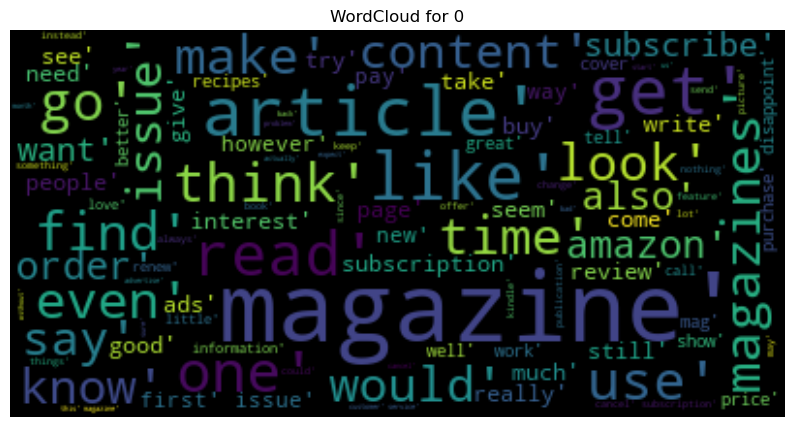

In [28]:
word_cloud(list_tokenizer(rating_zero), 0)

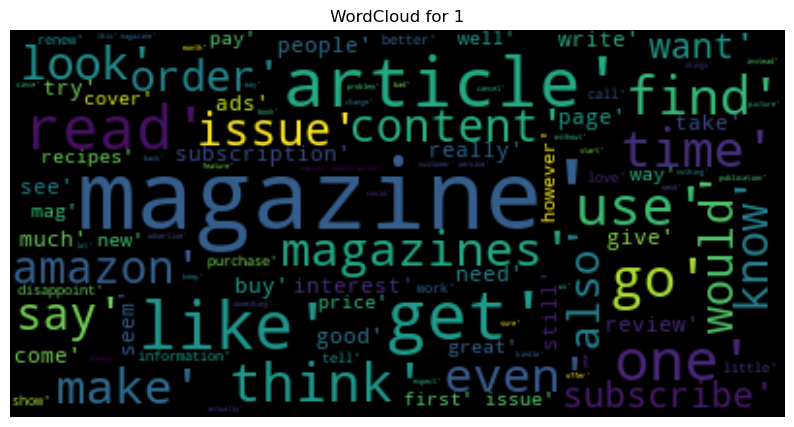

In [29]:
word_cloud(list_tokenizer(rating_zero), 1)

In [30]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize the text in each review
tokenized_reviews = train_ds['reviewText'].apply(word_tokenize)

# Concatenate all the tokenized reviews into a single list
all_words = [word for review in tokenized_reviews for word in review]

# Find the frequency distribution of words
fdist = FreqDist(all_words)

# Get the top 50 most frequently occurring words
top_words = fdist.most_common(50)

In [31]:
# Remove common words
train_ds["reviewText"] = train_ds["reviewText"].apply(
    lambda x: ' '.join([word for word in x.split() if word not in top_words]))

In [32]:
# Converting the dataframe to preprocessed data 
train_ds.to_csv("Magazine_Subscription_Preprocessed_Data.csv",index=False)

In [33]:
train_ds

,overall,reviewText
0,1,for computer enthusiast maxpc welcome sight mailbox remember years savorying every page boot call begin still obcessed pcs anyone advance users beginners look knowledge profit every issue maxpc ic...
1,1,thank god ziff davis publication maxpc actually tell product bad print think something sugar coat would compare style car driver technical know good time
2,0,antiques magazine publication make antique lovers history buff page load photos artistic paint handmade goods rare picture items similar nature magazine love antique also consider historians since...
3,1,this beautiful magazine work art quality every page bits information fascinate see art home read every word include ads first discover gem london many years ago home welcome
4,1,great read every issue
...,...,...
89684,1,this nice surprise boyfriend really enjoy olympics edition bring back childhood order back july state first issue would arrive end august end receive first issue next week quite impress
89685,0,magazine look like print recycle shoe rubber blurry crap barely article anymore bother
89686,1,cant go wrong si subscription please
89687,1,this magazine far time favorite one metal detect like others american digger one like different type article write put together interest stories likely subscribe paper edition soon


## MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
%matplotlib inline
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings('ignore')

# CHECKING DATASET
1. Check for null values if present and not affecting remove the values. 

In [2]:
# Load the dataset
train_ds = pd.read_csv('/kaggle/input/magazine-subscription-preprocessed-data/Magazine_Subscription_Preprocessed_Data.csv')

In [3]:
train_ds

,overall,reviewText
0,1,for computer enthusiast maxpc welcome sight mailbox remember years savorying every page boot call begin still obcessed pcs anyone advance users beginners look knowledge profit every issue maxpc ic...
1,1,thank god ziff davis publication maxpc actually tell product bad print think something sugar coat would compare style car driver technical know good time
2,0,antiques magazine publication make antique lovers history buff page load photos artistic paint handmade goods rare picture items similar nature magazine love antique also consider historians since...
3,1,this beautiful magazine work art quality every page bits information fascinate see art home read every word include ads first discover gem london many years ago home welcome
4,1,great read every issue
...,...,...
89651,1,this nice surprise boyfriend really enjoy olympics edition bring back childhood order back july state first issue would arrive end august end receive first issue next week quite impress
89652,0,magazine look like print recycle shoe rubber blurry crap barely article anymore bother
89653,1,cant go wrong si subscription please
89654,1,this magazine far time favorite one metal detect like others american digger one like different type article write put together interest stories likely subscribe paper edition soon


In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89656 entries, 0 to 89655
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     89656 non-null  int64 
 1   reviewText  89551 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
train_ds = train_ds.dropna()

# TF-IDF VECTORIZER
1. Selecting maxfeatures as 10000
2. Creating a pickle file of TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
feature_vector = tfidf_vectorizer.fit(train_ds.reviewText)
train_ds_features = tfidf_vectorizer.transform(train_ds.reviewText)
features = feature_vector.get_feature_names_out()
print("Total number of features: ", len(features))

Total number of features:  10000


In [10]:
import pickle
with open('tf_idf_obj_10000.pkl', 'wb') as file:
    pickle.dump({
        'tf_idf_obj': tfidf_vectorizer,
        'feature_names': features
    }, file)

# SPLITTING THE DATASET
1. Train and Test Set
2. Test_size: 0.3 , Train Data: 0.7

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_ds_features, train_ds.overall,
                                                test_size = 0.3,
                                                random_state = 42)

# MODELS USED: 
 1. BernoulliNB
 2. Multinomial
 3. LinearSVC
 4. Logistic Regression
 5. Random Forest Classifier

In [13]:
nb_clf = BernoulliNB()
nb_clf.fit(train_X.toarray(), train_y)

BernoulliNB()

In [14]:
test_ds_predicted = nb_clf.predict(test_X.toarray())

In [15]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.60      0.52      0.55      6871
           1       0.84      0.88      0.86     19995

    accuracy                           0.79     26866
   macro avg       0.72      0.70      0.71     26866
weighted avg       0.78      0.79      0.78     26866



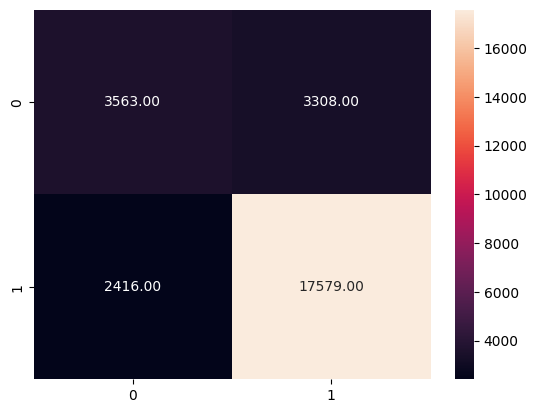

In [16]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

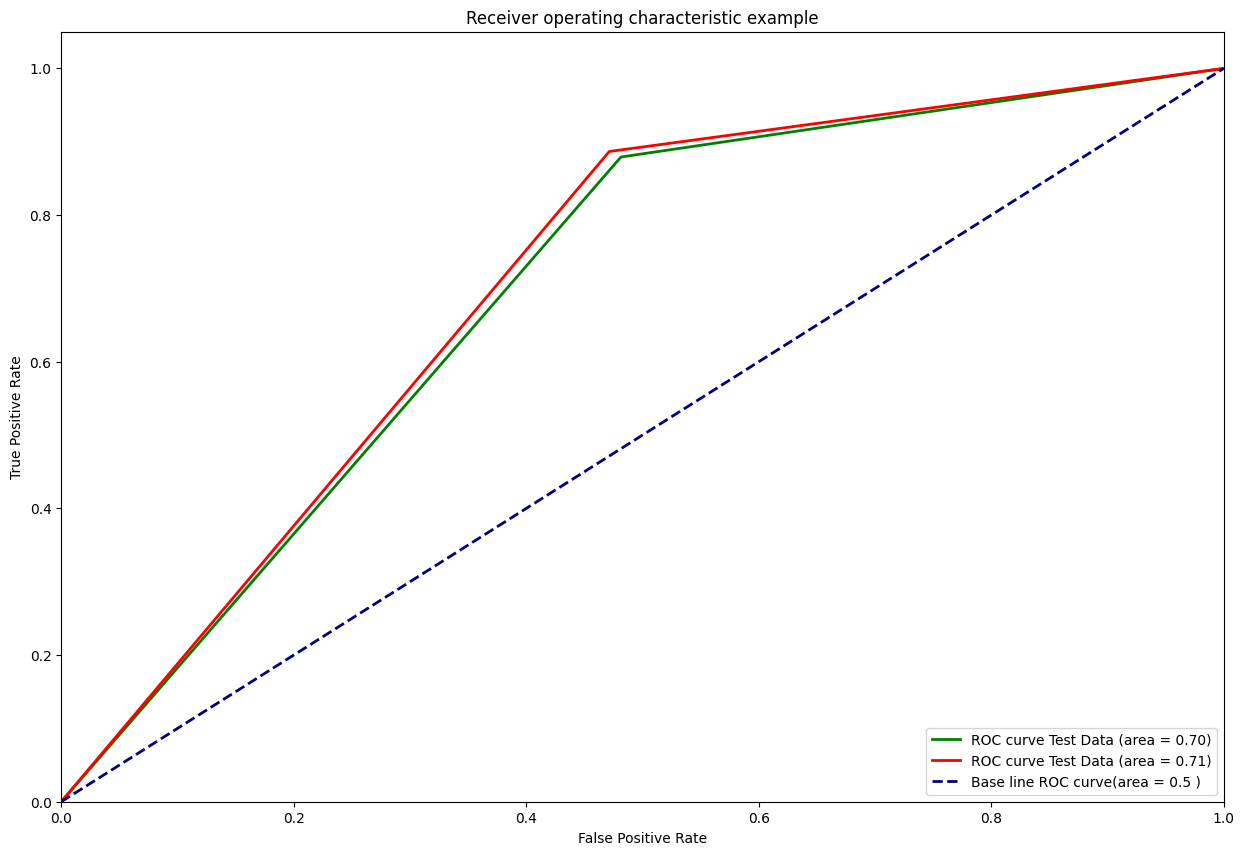

In [78]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(nb_clf,train_X,train_y,test_X,test_y)

In [19]:
mul = MultinomialNB()
mul.fit(train_X.toarray(), train_y)

MultinomialNB()

In [20]:
test_ds_predicted = mul.predict(test_X.toarray())

In [21]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.83      0.54      0.66      6871
           1       0.86      0.96      0.91     19995

    accuracy                           0.86     26866
   macro avg       0.85      0.75      0.78     26866
weighted avg       0.85      0.86      0.84     26866



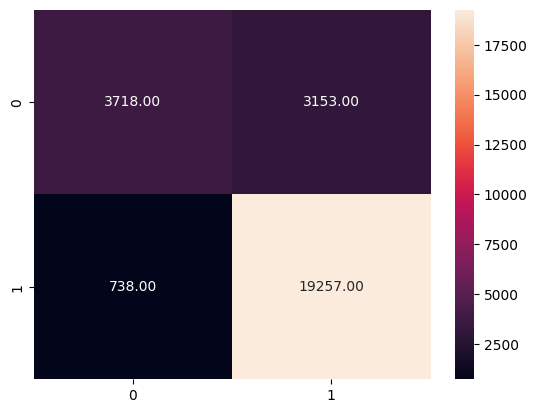

In [22]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

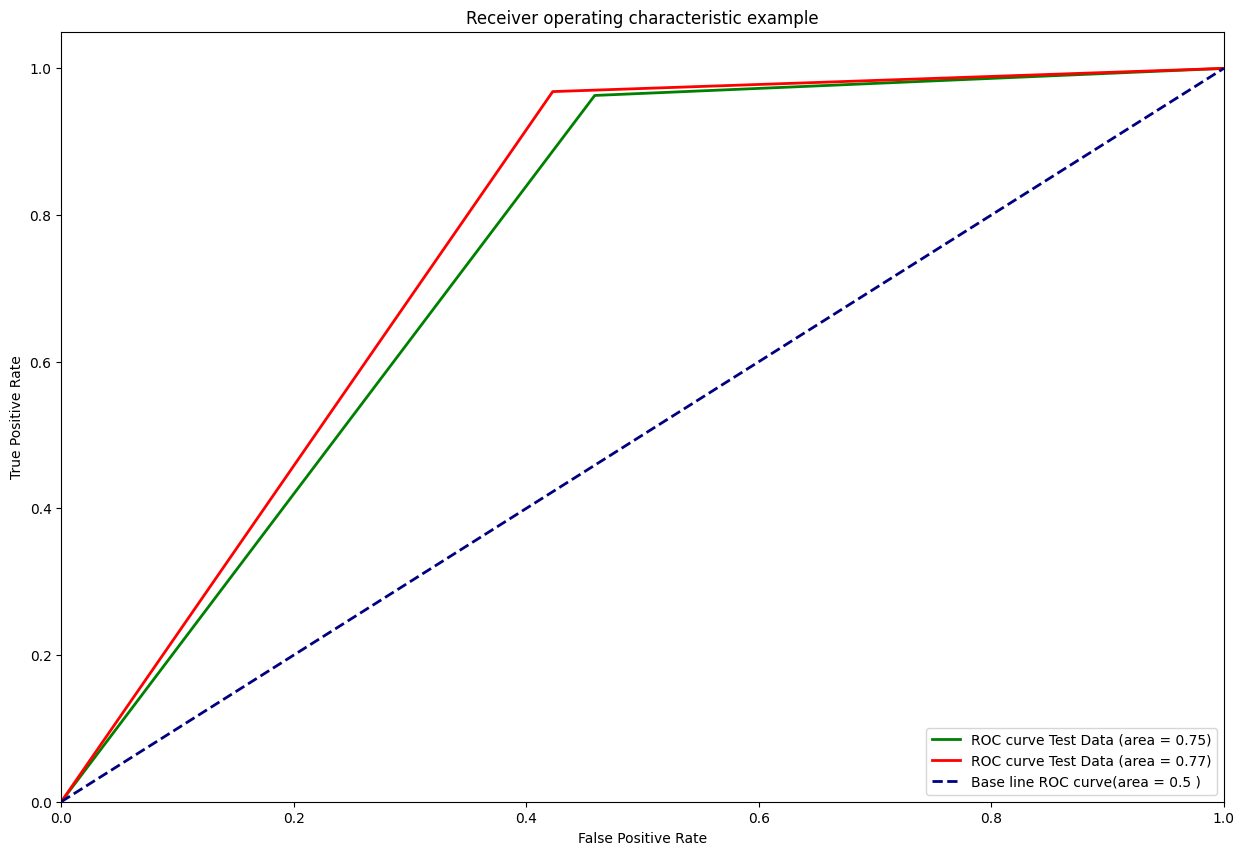

In [79]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(mul,train_X,train_y,test_X,test_y)

In [26]:
log = LogisticRegression()
log.fit(train_X.toarray(), train_y)

LogisticRegression()

In [27]:
test_ds_predicted = log.predict(test_X.toarray())

In [28]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.81      0.71      0.75      6871
           1       0.90      0.94      0.92     19995

    accuracy                           0.88     26866
   macro avg       0.86      0.82      0.84     26866
weighted avg       0.88      0.88      0.88     26866



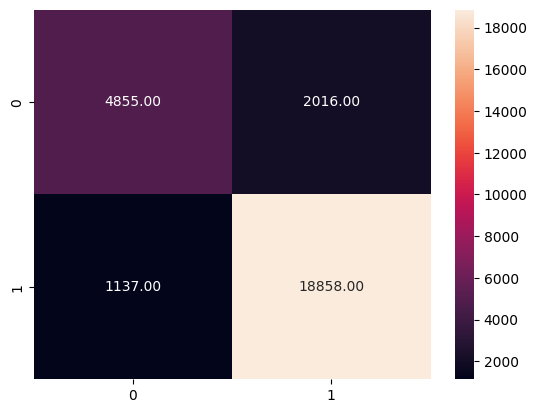

In [29]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

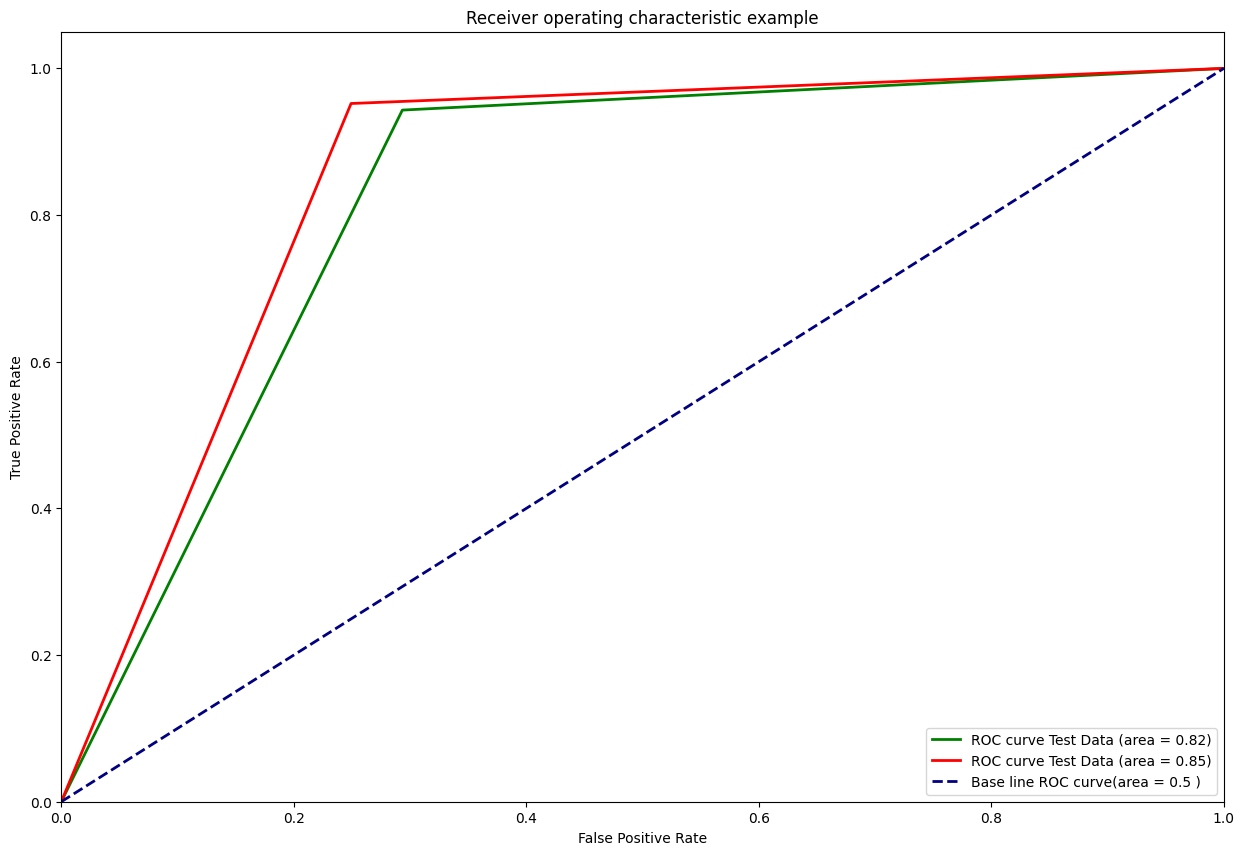

In [80]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(log,train_X,train_y,test_X,test_y)

In [32]:
svc = LinearSVC()
svc.fit(train_X.toarray(), train_y)

LinearSVC()

In [33]:
test_ds_predicted = svc.predict(test_X.toarray())

In [34]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      6871
           1       0.91      0.93      0.92     19995

    accuracy                           0.88     26866
   macro avg       0.85      0.83      0.84     26866
weighted avg       0.88      0.88      0.88     26866



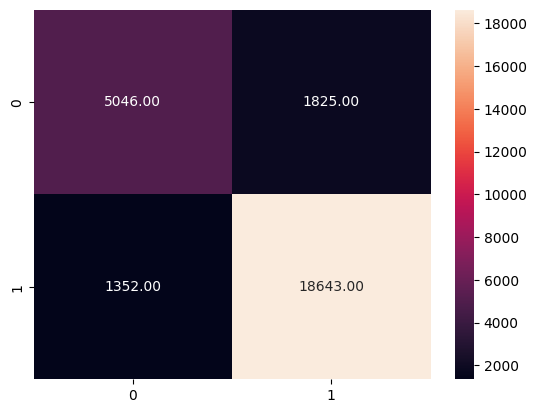

In [35]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

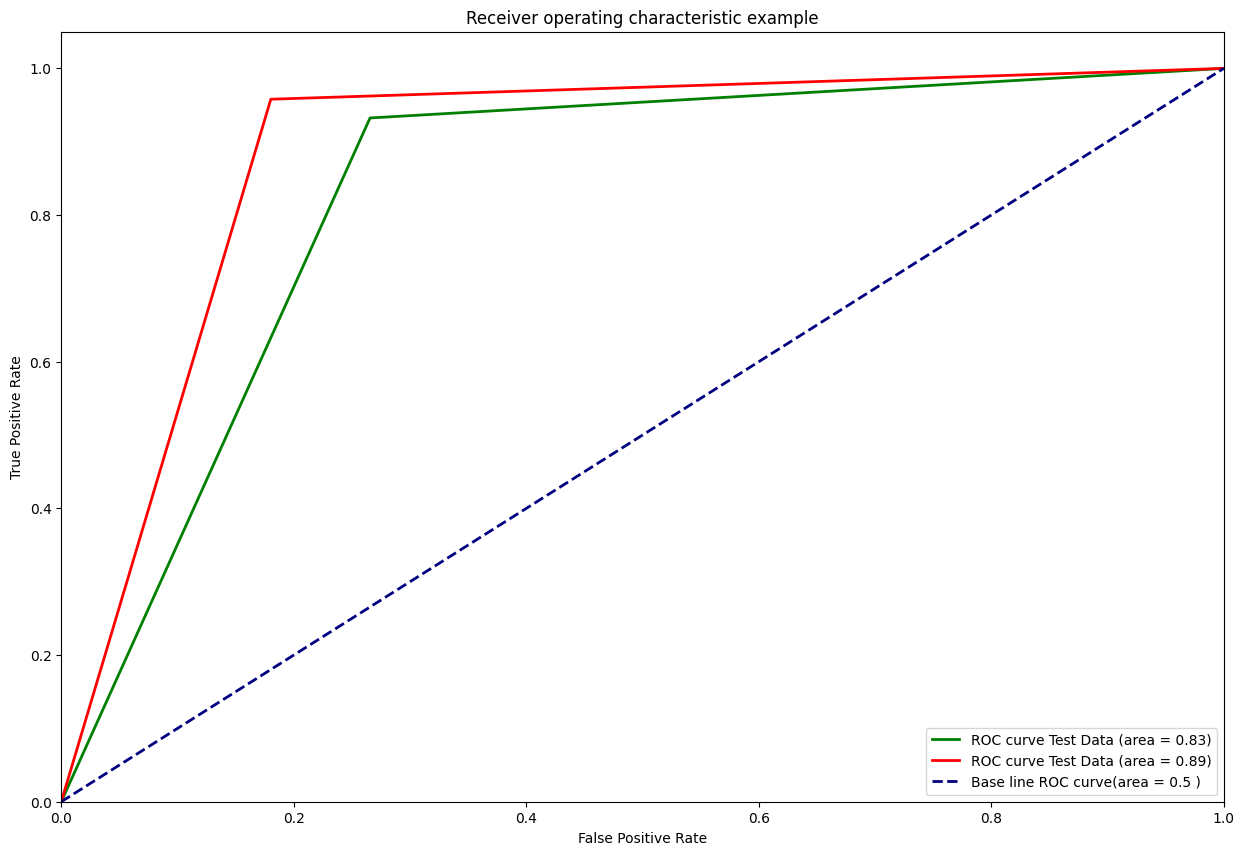

In [81]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(svc,train_X,train_y,test_X,test_y)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rfc.fit(train_X, train_y)

# Predict the target values for the testing set
predicted_y = rfc.predict(test_X)

In [39]:
from sklearn import metrics 

print(metrics.classification_report(test_y, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71      6871
           1       0.88      0.96      0.92     19995

    accuracy                           0.87     26866
   macro avg       0.86      0.79      0.81     26866
weighted avg       0.87      0.87      0.87     26866



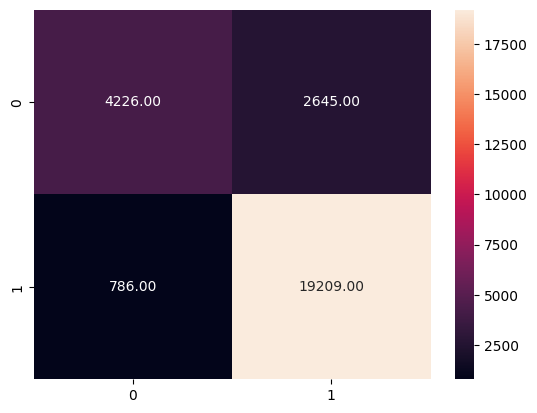

In [40]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, predicted_y) 
sn.heatmap(cm, annot=True, fmt='.2f');

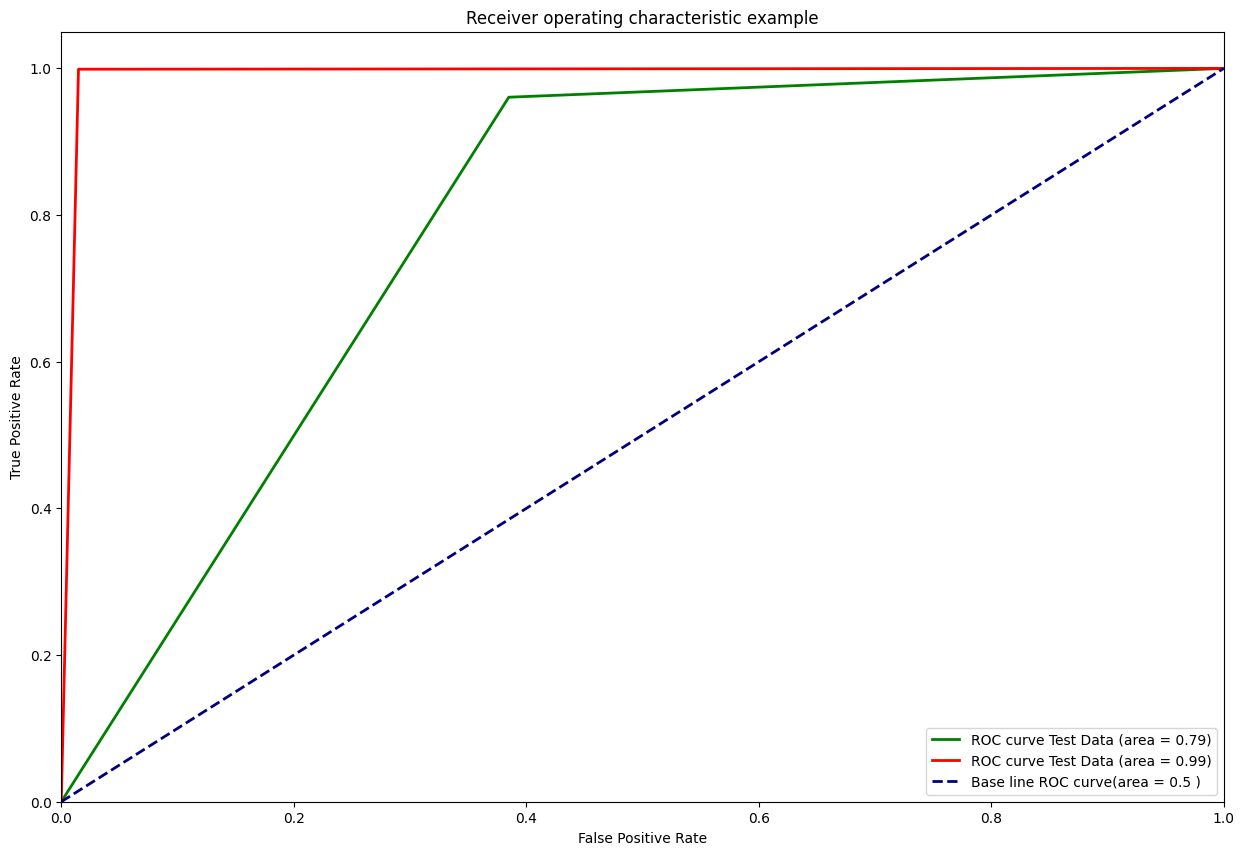

In [82]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(rfc,train_X,train_y,test_X,test_y)

## MAKE PICKLE FILES OF MODEL

In [ ]:
import joblib
joblib.dump( nb_clf, "BernoulliNB_Model_10000.pkl" )
joblib.dump( nb_clf, "MultinomialNB_Model_10000.pkl" )
joblib.dump( log, "LogisticRegression_Model_10000.pkl" )
joblib.dump( svc, "LinearSVC_Model_10000.pkl" )
joblib.dump( rfc, "RandomForestClassifier_Model_10000.pkl" )

## TESTING DATA 
1. : Check null values
2. : Apply TF-IDF on any row of TEST DATA
3. : Apply different models on data

In [42]:
test_ds = pd.read_csv("/kaggle/input/test-data/MagazineSubcriptionReviews_Preprocessed_TestData.csv")

In [53]:
test_ds

,Rating,ReviewText
0,1,used word among u wau number year try another daily devotional guide always come back one layout easy navigate including kindle quality article meditation good require theological training underst...
1,1,prefer e version publication convenient access device subscriber year recommend friend interested access scripture know reading mass reading three year cycle expose nearly text bible incredible pr...
2,0,year old reading publication year first thing daily mass reading meditation following try one article either entirety partially depending time night article two three time realize article one time...
3,1,getting word quite first time disappointed next month download always ready st month time work nov st fell sunday reading vigil mass needed since following ordinary time mass celebrating saint
4,1,like clear wish monthly digital subscription arrive day due arrive miss following mass reading hear mass morning subscription yet digitally sent arrive exactly day help sent digitally early mornin...
...,...,...
1395,1,good content overrun ad
1396,1,good value perfect father day
1397,0,nice article alot ad
1398,1,revised ripped guy vape ad still would really like see kind ad something sharing child see content appropriate literate youngster well adult reviewing realize balance really favor great article va...


In [43]:
test_ds.isnull().sum()

Rating        0
ReviewText    0
dtype: int64

## Loading pickle file of TF-IDF
1. Apply the tf-idf on any row data selected

In [58]:
import pickle
with open('/kaggle/working/tf_idf_obj_10000.pkl', 'rb') as file:
    data = pickle.load(file)
    tf_idf_obj = data['tf_idf_obj']
    feature_names = data['feature_names']

# Transform the unseen data point using the loaded tf_idf_obj object
# Actual value = 1 
new_text_vectorized_1 = tf_idf_obj.transform([test_ds["ReviewText"][1]])

In [69]:
# Actual value = 0
new_text_vectorized_0 = tf_idf_obj.transform([test_ds["ReviewText"][2]])

## LOAD THE MODELS

In [66]:
import joblib

loaded_model1 = joblib.load("/kaggle/working/BernoulliNB_Model_10000.pkl")
loaded_model2 = joblib.load("/kaggle/working/MultinomialNB_Model_10000.pkl")
loaded_model3 = joblib.load("/kaggle/working/LinearSVC_Model_10000.pkl")
loaded_model4 = joblib.load("/kaggle/working/LogisticRegression_Model_10000.pkl")
loaded_model5 = joblib.load("/kaggle/working/RandomForestClassifier_Model_10000.pkl")

## PREDICTION ON DATA

In [61]:
# PREDICTED VALUE FOR ACTUAL VALUE 1 BY MODELS
prediction1_1 = loaded_model1.predict(new_text_vectorized_1)
prediction2_1  = loaded_model2.predict(new_text_vectorized_1)
prediction3_1  = loaded_model3.predict(new_text_vectorized_1)
prediction4_1  = loaded_model4.predict(new_text_vectorized_1)
prediction5_1  = loaded_model5.predict(new_text_vectorized_1)

In [70]:
# PREDICTED VALUE FOR ACTUAL VALUE 0 BY MODELS
prediction1_0 = loaded_model1.predict(new_text_vectorized_0)
prediction2_0 = loaded_model2.predict(new_text_vectorized_0)
prediction3_0 = loaded_model3.predict(new_text_vectorized_0)
prediction4_0 = loaded_model4.predict(new_text_vectorized_0)
prediction5_0 = loaded_model5.predict(new_text_vectorized_0)

## OUTPUT OF PREDICTION GIVEN BY MODELS

In [63]:
# PREDICTED VALUE FOR ACTUAL VALUE 1 BY MODELS
print("Prediction value Bernoulli: ",prediction1_1)
print("Prediction value Multinomial: ",prediction2_1)
print("Prediction value LinearSVC: ",prediction3_1)
print("Prediction value Logistic Regression: ",prediction4_1)
print("Prediction value Random Forest: ",prediction5_1)

Prediction value Bernoulli:  [1]
Prediction value Multinomial:  [1]
Prediction value LinearSVC:  [1]
Prediction value Logistic Regression:  [1]
Prediction value Random Forest:  [1]


In [71]:
# PREDICTED VALUE FOR ACTUAL VALUE 0 BY MODELS
print("Prediction value Bernoulli: ",prediction1_0)
print("Prediction value Multinomial: ",prediction2_0)
print("Prediction value LinearSVC: ",prediction3_0)
print("Prediction value Logistic Regression: ",prediction4_0)
print("Prediction value Random Forest: ",prediction5_0)

Prediction value Bernoulli:  [0]
Prediction value Multinomial:  [0]
Prediction value LinearSVC:  [1]
Prediction value Logistic Regression:  [1]
Prediction value Random Forest:  [1]


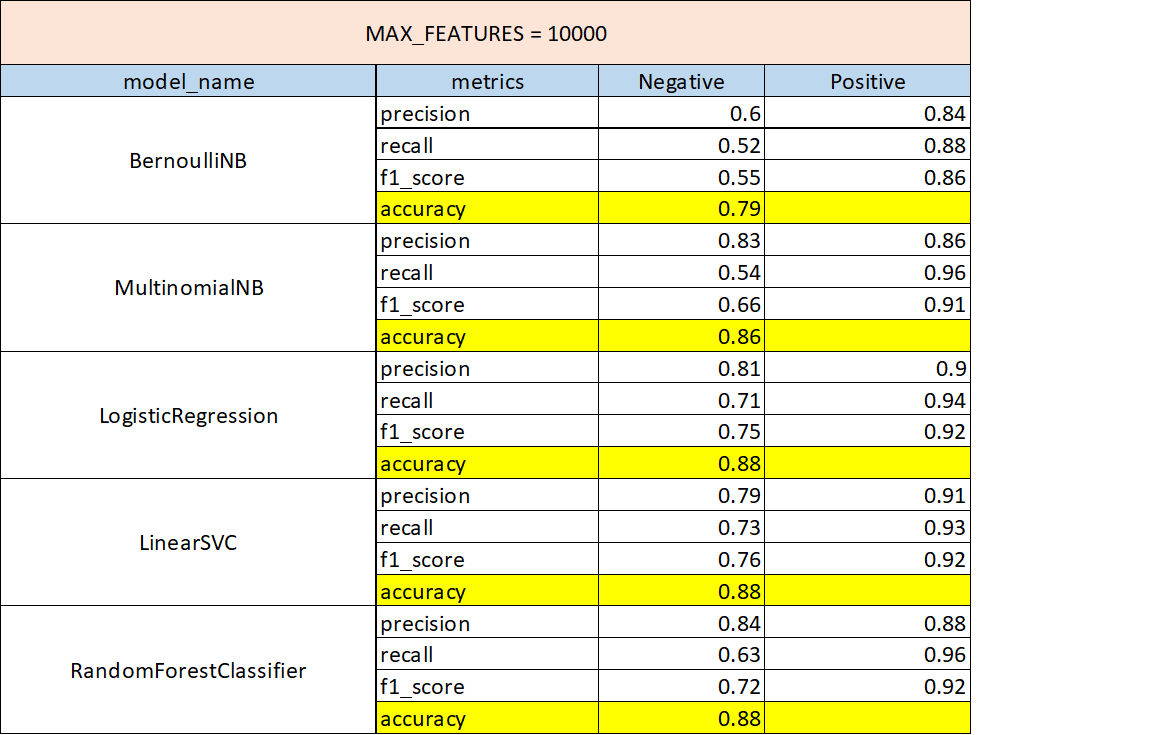

In [2]:
from IPython.display import Image
Image(filename='D:\Data Science CapStone Project\OUTPUT\Model Building - 2.png')

# TOPIC MODEL

In [1]:
import numpy as np
import pandas as pd

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stopwords = stopwords.words("english")

In [4]:
data = pd.read_csv('/kaggle/input/magazine-subscription-preprocessed-data/Magazine_Subscription_Preprocessed_Data.csv')

In [5]:
spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [6]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [7]:
data.dropna(subset=['reviewText'], inplace=True)

In [8]:
lemmatized_texts = lemmatization(data['reviewText'])

In [10]:
lemmatized_texts[0]

'computer enthusiast sight mailbox remember year savorye page boot call begin still obcesse pc advance user beginner look knowledge profit issue ice cake subscription come pack demo utilitie useful app helpful bless connection discover community hardware enthusiast web formerly boot really informative source compute news article day consider subscription worth subscription compute mag wait merge dvd medium maybe end offer info codec encode movie good audio video equipment try issue get hook'

In [11]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (len(data_words))
print (data_words[0])

89551
['computer', 'enthusiast', 'sight', 'mailbox', 'remember', 'year', 'savorye', 'page', 'boot', 'call', 'begin', 'still', 'obcesse', 'pc', 'advance', 'user', 'beginner', 'look', 'knowledge', 'profit', 'issue', 'ice', 'cake', 'subscription', 'come', 'pack', 'demo', 'utilitie', 'useful', 'app', 'helpful', 'bless', 'connection', 'discover', 'community', 'hardware', 'enthusiast', 'web', 'formerly', 'boot', 'really', 'informative', 'source', 'compute', 'news', 'article', 'day', 'consider', 'subscription', 'worth', 'subscription', 'compute', 'mag', 'wait', 'merge', 'dvd', 'medium', 'maybe', 'end', 'offer', 'info', 'codec', 'encode', 'movie', 'good', 'audio', 'video', 'equipment', 'try', 'issue', 'get', 'hook']


In [12]:
# Build the bigram and trigram models
# higher threshold fewer phrases.
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=50) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['computer', 'enthusiast', 'sight', 'mailbox', 'remember', 'year', 'savorye', 'page', 'boot', 'call', 'begin', 'still', 'obcesse', 'pc', 'advance', 'user', 'beginner', 'look', 'knowledge', 'profit', 'issue', 'ice_cake', 'subscription', 'come', 'pack', 'demo', 'utilitie', 'useful', 'app', 'helpful', 'bless', 'connection', 'discover', 'community', 'hardware', 'enthusiast', 'web', 'formerly', 'boot', 'really', 'informative', 'source', 'compute', 'news', 'article', 'day', 'consider', 'subscription', 'worth', 'subscription', 'compute', 'mag', 'wait', 'merge', 'dvd', 'medium', 'maybe', 'end', 'offer', 'info', 'codec', 'encode', 'movie', 'good', 'audio_video', 'equipment', 'try', 'issue', 'get', 'hook']


In [14]:
def remove_stopwords(texts):
    return ([[word for word in simple_preprocess(str(doc)) 
              if word not in stopwords] for doc in texts])

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [15]:
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_trigrams=make_trigrams(data_words_bigrams)

In [16]:
data_words_trigrams[0][:5]

['computer', 'enthusiast', 'sight', 'mailbox', 'remember']

In [17]:
from gensim.models import TfidfModel

id2word=corpora.Dictionary(data_words_trigrams)
print('Words in dictionary: ', len(id2word))

#Save dictionary
id2word.save('id2word.dict')

id2word.filter_extremes(no_below = 4)
print('Post filter, Words in dictionary: ', len(id2word))

Words in dictionary:  40175
Post filter, Words in dictionary:  11785


In [18]:
texts=data_words_trigrams

corpus=[id2word.doc2bow(text) for text in texts]
print(corpus[0][0:20])

tfidf=TfidfModel(corpus,id2word=id2word)

low_value=0.05
words=[]
words_missing_in_tfidf=[]

for i in range(0, len(corpus)):
    bow=corpus[i]
    low_value_words=[]
    tfidf_ids=[id for id, value in tfidf[bow]]
    bow_ids=[id for id, value in bow]
    low_value_words=[id for id, value in tfidf[bow] if value< low_value]
    drops=low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf=[id for id in bow_ids if id not in tfidf_ids]
    
    new_bow=[b for b in bow if b[0] not in low_value_words and b[0] not in 
             words_missing_in_tfidf]
    corpus[i]=new_bow

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [19]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('advance', 1),
  ('app', 1),
  ('audio_video', 1),
  ('begin', 1),
  ('beginner', 1),
  ('bless', 1),
  ('boot', 2),
  ('call', 1),
  ('come', 1),
  ('community', 1),
  ('compute', 2),
  ('computer', 1),
  ('connection', 1),
  ('consider', 1),
  ('day', 1),
  ('demo', 1),
  ('discover', 1),
  ('dvd', 1),
  ('end', 1),
  ('enthusiast', 2),
  ('equipment', 1),
  ('formerly', 1),
  ('hardware', 1),
  ('helpful', 1),
  ('hook', 1),
  ('ice_cake', 1),
  ('info', 1),
  ('informative', 1),
  ('issue', 2),
  ('knowledge', 1),
  ('look', 1),
  ('mag', 1),
  ('mailbox', 1),
  ('maybe', 1),
  ('medium', 1),
  ('merge', 1),
  ('movie', 1),
  ('news', 1),
  ('offer', 1),
  ('pack', 1),
  ('page', 1),
  ('pc', 1),
  ('profit', 1),
  ('really', 1),
  ('remember', 1),
  ('sight', 1),
  ('source', 1),
  ('still', 1),
  ('subscription', 3),
  ('try', 1),
  ('useful', 1),
  ('user', 1),
  ('wait', 1),
  ('web', 1),
  ('worth', 1)]]

In [20]:
## Check for optimum number of topics based on coherence scrore

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=30,
                                           alpha="auto")
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, 
        #                                         id2word=id2word)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, 
                                        dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_words_trigrams, 
                                                        start=2, limit=10, step=1)

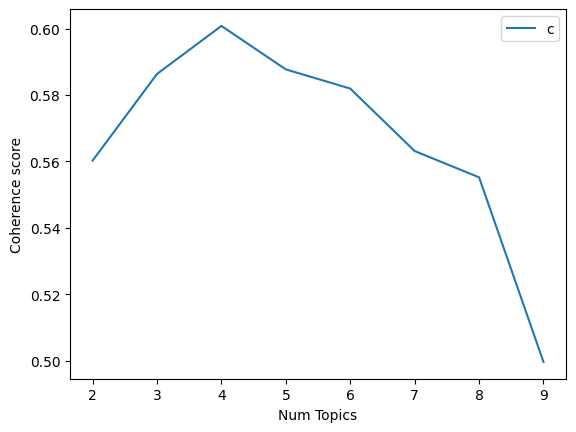

In [25]:
## Graph to choose the number of topics
import matplotlib.pyplot as plt

# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [26]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5603
Num Topics = 3  has Coherence Value of 0.5864
Num Topics = 4  has Coherence Value of 0.6008
Num Topics = 5  has Coherence Value of 0.5878
Num Topics = 6  has Coherence Value of 0.582
Num Topics = 7  has Coherence Value of 0.5632
Num Topics = 8  has Coherence Value of 0.5552
Num Topics = 9  has Coherence Value of 0.4996


In [27]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.061*"great" + 0.048*"love" + 0.046*"good" + 0.046*"read" + 0.038*"article" + 0.021*"enjoy" + 0.020*"interest" + 0.019*"really" + 0.018*"well" + 0.016*"lot"'), (1, '0.067*"recipe" + 0.044*"idea" + 0.024*"home" + 0.022*"tip" + 0.020*"live" + 0.019*"food" + 0.017*"useful" + 0.016*"make" + 0.013*"cook" + 0.012*"helpful"'), (2, '0.044*"issue" + 0.041*"get" + 0.034*"subscription" + 0.020*"time" + 0.018*"receive" + 0.017*"year" + 0.015*"month" + 0.015*"first" + 0.014*"order" + 0.014*"go"'), (3, '0.012*"write" + 0.012*"ad" + 0.010*"review" + 0.010*"page" + 0.010*"publication" + 0.008*"people" + 0.007*"story" + 0.006*"content" + 0.006*"article" + 0.006*"world"')]


In [28]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, id2word, mds="mmds", R=30)
vis

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.301873 -0.189518       1        1  31.977267
3     -0.190886  0.239652       2        1  31.825689
0      0.185350 -0.284097       3        1  27.912236
1      0.307410  0.233964       4        1   8.284808, topic_info=           Term          Freq         Total Category  logprob  loglift
188       great  24300.000000  24300.000000  Default  30.0000  30.0000
130        love  19024.000000  19024.000000  Default  29.0000  29.0000
24         good  18301.000000  18301.000000  Default  28.0000  28.0000
155        read  18182.000000  18182.000000  Default  27.0000  27.0000
31        issue  19919.000000  19919.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1445     design   1116.316641   1519.727609   Topic4  -4.6616   2.1823
132        make   1875.812438   7059.161565   Topic4  -4.1426   1.1655
179   beautiful    929.348677   2481.853333   Topic4  -4.8450   1.5085
52          try    880.091770   3865.373599   Topic4  -4.8994   1.0110
368         use    877.679846   5649.116051   Topic4  -4.9022   0.6288

[215 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2759      1  0.999587         access
177       2  0.999753             ad
1095      1  0.148911      advertise
1095      2  0.850450      advertise
534       2  0.999232  advertisement
...     ...       ...            ...
273       2  0.999497          world
176       2  0.999778          write
369       2  0.999648         writer
58        1  0.607163           year
58        3  0.392820           year

[253 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])